In [495]:
import pandas as pd

In [496]:
queries = pd.read_csv('queries.csv', sep=" ")

In [497]:
def label_timestamp (row) -> str:
	hour_of_day: int = row['timestamp'] % 24
	if 0 <= hour_of_day <= 8:
		return "00-08"
	elif 8 < hour_of_day <= 17:
		return "08-17"
	elif 17 < hour_of_day <= 20:
		return "17-20"
	else:
		return "20-00"

def label_day(row) -> str:
	day: int = int(row['timestamp'] / 24) % 7
	return "Weekend" if day >= 5 else "Workday"

In [498]:
queries['time_period'] = queries.apply(lambda row: label_timestamp(row), axis=1)
queries['day_type'] = queries.apply(lambda row: label_day(row), axis=1)

In [499]:
user_x = queries[queries["ip_address"]=="146.71.112.211"].groupby(["day_type", "time_period", "lat", "lon"])["poi_type_query"]
user_y = queries[queries["ip_address"]=="118.135.166.110"].groupby(["day_type", "time_period", "lat", "lon"])["poi_type_query"]

In [500]:
user_x.aggregate(lambda x: "{}-{}".format(len(list(x)),str(set(x))))

day_type  time_period  lat        lon     
Weekend   08-17        46.509751  6.641607                                   1-{'club'}
                       46.522632  6.564536                                   1-{'dojo'}
                       46.526904  6.562937                                    1-{'gym'}
                       46.529156  6.627356             4-{'gym', 'dojo', 'supermarket'}
                       46.530865  6.623209                    5-{'club', 'supermarket'}
                       46.532748  6.628007                            1-{'supermarket'}
                       46.564457  6.566800                                    1-{'gym'}
                       46.566729  6.550642                                    1-{'gym'}
Workday   08-17        46.535919  6.575488               30-{'restaurant', 'cafeteria'}
          17-20        46.529156  6.627356             4-{'gym', 'dojo', 'supermarket'}
                       46.530865  6.623209    20-{'gym', 'club', 'dojo', 'sup

In [501]:
user_y.aggregate(lambda x: "{}-{}".format(len(list(x)),str(set(x))))

day_type  time_period  lat        lon     
Weekend   08-17        46.506457  6.598229                                            1-{'bar'}
                       46.509162  6.616751         5-{'restaurant', 'cafeteria', 'supermarket'}
                       46.513246  6.614959                                    1-{'supermarket'}
                       46.529064  6.603693                              2-{'restaurant', 'bar'}
                       46.531953  6.605405                                      1-{'cafeteria'}
                       46.555694  6.599631                                            1-{'bar'}
                       46.564591  6.606165                                      1-{'cafeteria'}
Workday   08-17        46.509162  6.616751                      2-{'restaurant', 'supermarket'}
                       46.520903  6.613859                       30-{'restaurant', 'cafeteria'}
          17-20        46.507165  6.611651    4-{'restaurant', 'bar', 'supermarket', 'cafete.

<Axes: xlabel='day_type,time_period,lat,lon', ylabel='#Times the location occurs'>

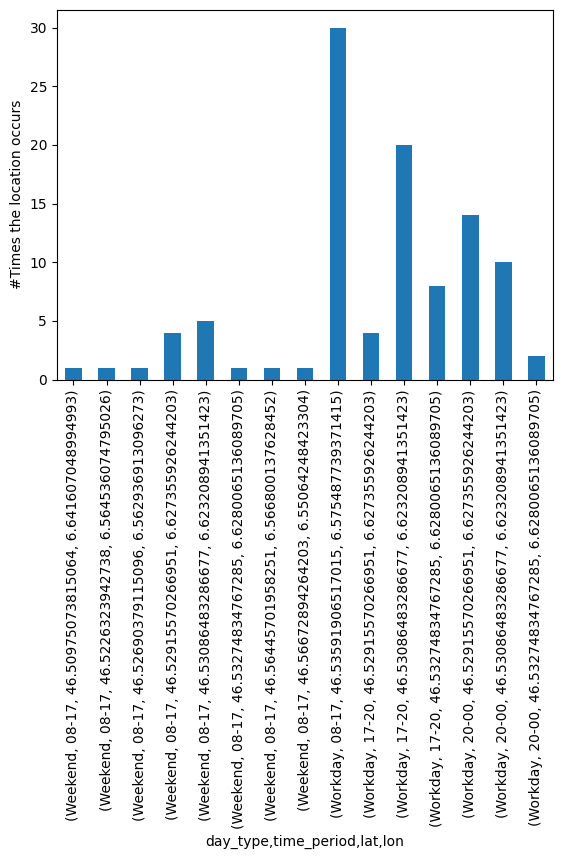

In [502]:
user_x.count().plot(kind = "bar", ylabel = "#Times the location occurs")

<Axes: xlabel='day_type,time_period,lat,lon', ylabel='#Times the location occurs'>

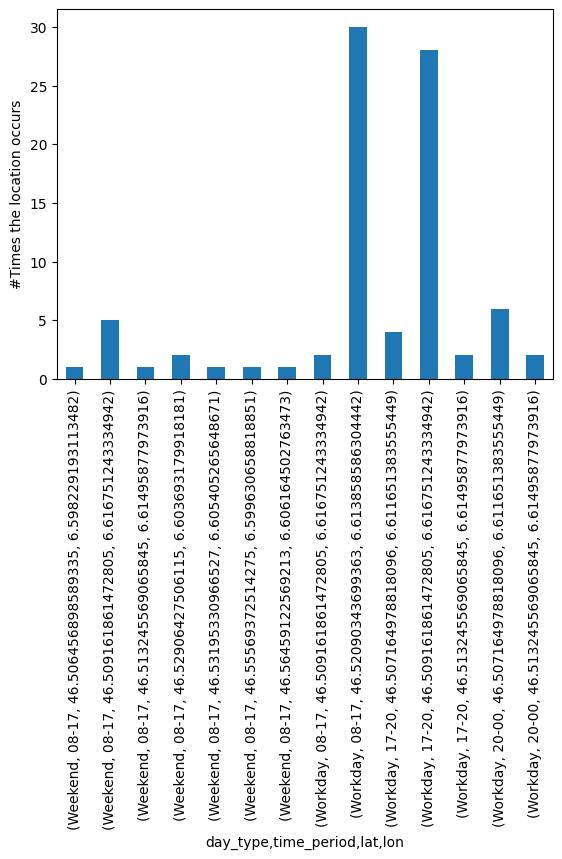

In [503]:
user_y.count().plot(kind = "bar", ylabel = "#Times the location occurs")